In [2]:
pip install influxdb-client paho-mqtt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.4/745.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS
import paho.mqtt.client as mqtt
import time

# InfluxDB setup
influx_url = "https://us-east-1-1.aws.cloud2.influxdata.com/"
influx_token = "GBAkN_cc5MGb5F38wyjyaGgZAd_OydltZiIELlS_XEvP5G8RQuHOj6Zo5uod0UAumPSxPeUaCr8oKMdPh13Lsg=="
influx_org = "Deakin Uni"
influx_bucket = "gyroscope_data"  # Make sure this bucket exists in your InfluxDB account

influx_client = InfluxDBClient(url=influx_url, token=influx_token, org=influx_org)
write_api = influx_client.write_api(write_options=SYNCHRONOUS)

# MQTT setup
mqtt_broker = "167bf450a17742259903b2d12531cbea.s1.eu.hivemq.cloud"
mqtt_port = 8883
mqtt_topic = "sensor/gyroscope"
mqtt_username = ""
mqtt_password = ""

def on_message(client, userdata, msg):
    payload = msg.payload.decode()
    x, y, z = map(float, payload.split(','))
    
    point = Point("gyroscope") \
        .field("x", x) \
        .field("y", y) \
        .field("z", z) \
        .time(time.time_ns(), WritePrecision.NS)
    
    write_api.write(bucket=influx_bucket, org=influx_org, record=point)
    print(f"Data sent to InfluxDB: {x}, {y}, {z}")

client = mqtt.Client()
client.on_message = on_message
client.username_pw_set(mqtt_username, mqtt_password)
client.tls_set()  # Enable SSL/TLS
client.connect(mqtt_broker, mqtt_port)
client.subscribe(mqtt_topic)

print("Collecting data for 30 minutes...")
client.loop_start()
time.sleep(1800)  # 30 minutes
client.loop_stop()

print("Data collection complete.")

/var/folders/s1/_9n_hw1n0xddhcntyvxyd4h40000gq/T/ipykernel_24552/3856220532.py:35: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Data sent to InfluxDB: -12.27, -1.28, -0.98
Data sent to InfluxDB: -0.37, -0.85, -0.49
Data sent to InfluxDB: -0.55, -1.89, -1.34
Data sent to InfluxDB: -2.08, -1.1, -0.92
Data sent to InfluxDB: -183.72, 13.0, 258.91
Data sent to InfluxDB: -174.62, 26.37, 308.96
Data sent to InfluxDB: 323.67, 91.19, 186.1
Data sent to InfluxDB: -421.75, -237.85, -361.94
Data sent to InfluxDB: 22.4, 27.28, -59.63
Data sent to InfluxDB: -163.7, 340.58, 136.35
Data sent to InfluxDB: 89.6, -260.8, 217.9
Data sent to InfluxDB: 56.4, -60.67, 726.01
Data sent to InfluxDB: -152.47, -478.27, 113.95
Data sent to InfluxDB: -36.5, 204.1, 236.88
Data sent to InfluxDB: 220.89, -249.21, 333.07
Data sent to InfluxDB: -31.43, 492.31, 152.16
Data sent to InfluxDB: 169.07, -164.0, -180.05
Data sent to InfluxDB: 16.72, 4.7, 12.57
Data sent to InfluxDB: 7.02, -100.04, -45.96
Data sent to InfluxDB: 40.65, 21.85, -41.69
Data sent to InfluxDB: 0.06, -0.85, -0.43
Data sent to InfluxDB: 0.0, -0.73, -0.37
Data sent to InfluxDB: 

In [17]:
import pandas as pd
import datetime

# Read the CSV file
input_file = 'influxdata_2024-09-04T13_57_00Z.csv'
df = pd.read_csv(input_file, skiprows=3)  # Skip the first 3 rows (metadata)

print("Original columns:", df.columns)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Rename the 'time' column to 'timestamp'
df = df.rename(columns={'time': 'timestamp'})

# Convert timestamp to desired format
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S.%f')

# Function to safely convert to numeric, replacing errors with NaN
def safe_numeric(x):
    try:
        return pd.to_numeric(x, errors='coerce')
    except TypeError:
        return pd.Series([pd.to_numeric(i, errors='coerce') for i in x])

# Ensure x, y, z are numeric
for col in ['x', 'y', 'z']:
    df[col] = safe_numeric(df[col])

# Sort by timestamp
df = df.sort_values('timestamp')

# Generate output filename with current timestamp
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_filename = f'clean_gyroscope_data_{current_time}.csv'

# Save to CSV
df.to_csv(output_filename, index=False)
print(f"Data has been cleaned and saved to {output_filename}")

# Display the first few rows of the cleaned data
print(df.head())

# Display data info
print(df.info())

Original columns: Index(['Unnamed: 0', 'time', 'x', 'y', 'z'], dtype='object')
Data has been cleaned and saved to clean_gyroscope_data_20240905_000838.csv
                    timestamp       x      y       z
0  2024-09-04 10:48:16.809979  -12.27  -1.28   -0.98
1  2024-09-04 10:48:18.162735   -0.37  -0.85   -0.49
2  2024-09-04 10:48:18.778424   -0.55  -1.89   -1.34
3  2024-09-04 10:48:19.821934   -2.08  -1.10   -0.92
4  2024-09-04 10:48:20.926866 -183.72  13.00  258.91
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1790 non-null   object 
 1   x          1790 non-null   float64
 2   y          1790 non-null   float64
 3   z          1790 non-null   float64
dtypes: float64(3), object(1)
memory usage: 56.1+ KB
None


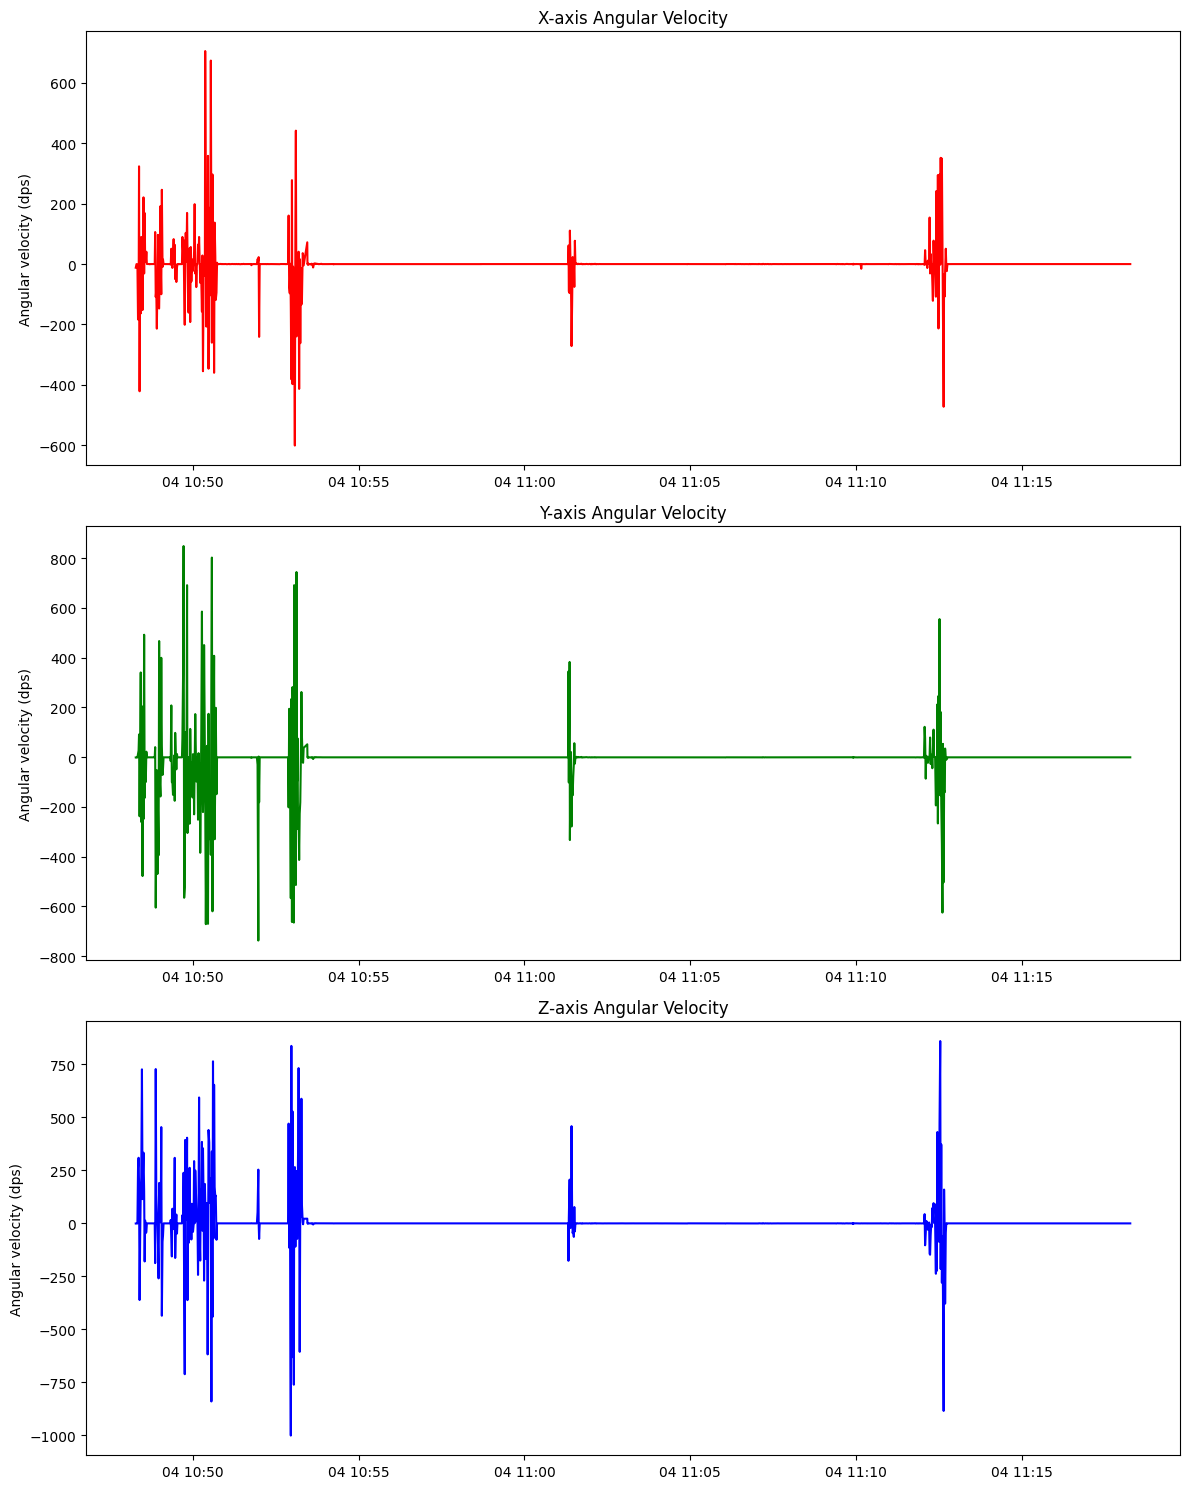

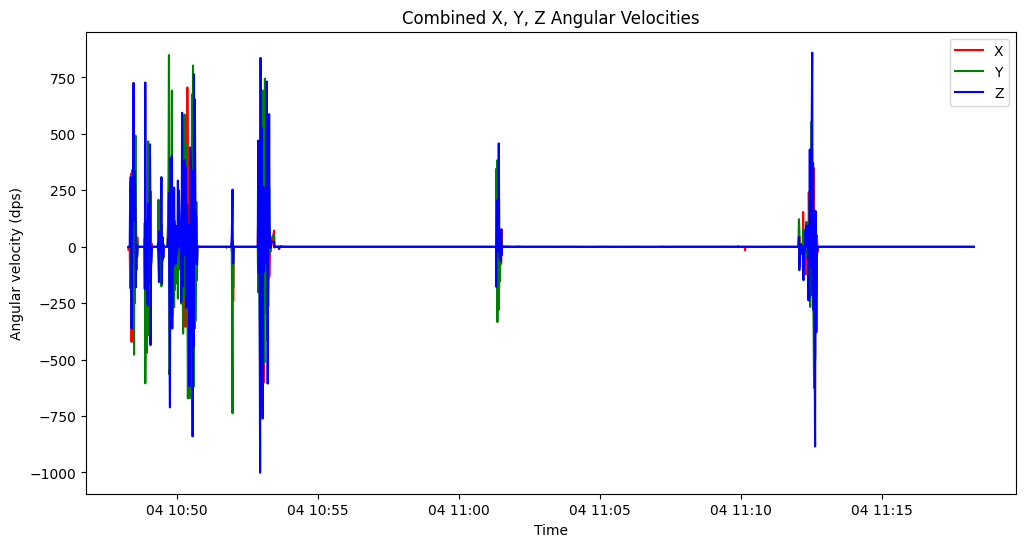

In [18]:
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

ax1.plot(df['timestamp'], df['x'], color='red')
ax1.set_title('X-axis Angular Velocity')
ax1.set_ylabel('Angular velocity (dps)')

ax2.plot(df['timestamp'], df['y'], color='green')
ax2.set_title('Y-axis Angular Velocity')
ax2.set_ylabel('Angular velocity (dps)')

ax3.plot(df['timestamp'], df['z'], color='blue')
ax3.set_title('Z-axis Angular Velocity')
ax3.set_ylabel('Angular velocity (dps)')

plt.tight_layout()
plt.savefig('individual_plots.png')

# Create combined plot
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x'], color='red', label='X')
plt.plot(df['timestamp'], df['y'], color='green', label='Y')
plt.plot(df['timestamp'], df['z'], color='blue', label='Z')
plt.title('Combined X, Y, Z Angular Velocities')
plt.xlabel('Time')
plt.ylabel('Angular velocity (dps)')
plt.legend()
plt.savefig('combined_plot.png')

plt.show()